# 决策树

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

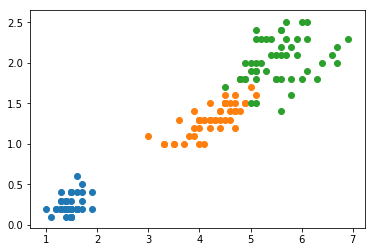

In [3]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100))
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

### *这里开始对 plot_decision_boundary 函数做些试验和思考*

In [18]:
x = np.linspace(0,1,5)
y = np.linspace(0,1,3)
x0, x1 = np.meshgrid(x,y)
print(x0)
x1

[[0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]]


array([[0. , 0. , 0. , 0. , 0. ],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [1. , 1. , 1. , 1. , 1. ]])

In [19]:
x0.ravel()

array([0.  , 0.25, 0.5 , 0.75, 1.  , 0.  , 0.25, 0.5 , 0.75, 1.  , 0.  ,
       0.25, 0.5 , 0.75, 1.  ])

In [20]:
x1.ravel()

array([0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 1. , 1. ,
       1. , 1. ])

In [21]:
np.c_[x0.ravel(), x1.ravel()]

array([[0.  , 0.  ],
       [0.25, 0.  ],
       [0.5 , 0.  ],
       [0.75, 0.  ],
       [1.  , 0.  ],
       [0.  , 0.5 ],
       [0.25, 0.5 ],
       [0.5 , 0.5 ],
       [0.75, 0.5 ],
       [1.  , 0.5 ],
       [0.  , 1.  ],
       [0.25, 1.  ],
       [0.5 , 1.  ],
       [0.75, 1.  ],
       [1.  , 1.  ]])

### *以上思考结束, 接下来回到决策树正轨上来*

C:\Users\fangyang\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


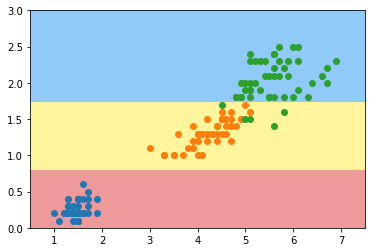

In [7]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

# 信息熵

### $H= -\sum_{i=1}^{k} p_i log(p_i)$ 熵越大, 越不稳定, 越不确定

In [9]:
a = [1/3, 1/3, 1/3]
b = [1/10, 2/10, 7/10]
c = [0.99998, 0.00001, 0.00001]
entropy_a = sum([-i*np.log(i) for i in a])
entropy_b = sum([-i*np.log(i) for i in b])
entropy_c = sum([-i*np.log(i) for i in c])
print(entropy_a, entropy_b, entropy_c ,sep='\n')

1.0986122886681096
0.8018185525433373
0.00025025830929809126


In [10]:
def entropy(p):
    return -p*np.log(p) - (1-p)*np.log(1-p)

In [11]:
x = np.linspace(0.01, 0.99, 200)

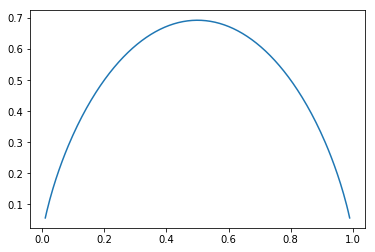

In [12]:
plt.plot(x, entropy(x))
plt.show()